In [133]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from keras.models import model_from_json
from keras.optimizers import SGD
from keras.optimizers import Adam

In [134]:
from keras.datasets import mnist

In [135]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [136]:
len(x_test)

10000

In [138]:
x_train.shape

(60000, 28, 28)

In [139]:
x_test.shape

(10000, 28, 28)

In [140]:
# reshape the data
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [141]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [142]:
y_train[87]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [143]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.utils import np_utils

# Optimizer : Adam
# Activation Function : SGD
# Nomalization : no
# Dense : 4, 2, 10

In [160]:
model = Sequential()

In [162]:
model.add(Dense(4, input_dim=784))
model.add(Activation('sigmoid'))
model.add(Dense(2))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [163]:
model.compile(loss='mse', optimizer=Adam(lr=0.001,beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False), metrics=['accuracy'])

In [164]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 4)                 3140      
_________________________________________________________________
activation_21 (Activation)   (None, 4)                 0         
_________________________________________________________________
dense_22 (Dense)             (None, 2)                 10        
_________________________________________________________________
activation_22 (Activation)   (None, 2)                 0         
_________________________________________________________________
dense_23 (Dense)             (None, 10)                30        
_________________________________________________________________
activation_23 (Activation)   (None, 10)                0         
Total params: 3,180
Trainable params: 3,180
Non-trainable params: 0
_________________________________________________________________


In [204]:
history = model.fit(x_train, y_train, batch_size=64, epochs=40,
                        verbose = 1,
                        validation_data = (x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 5s 90us/step - loss: 0.0430 - acc: 0.6801 - val_loss: 0.0411 - val_acc: 0.6947
Epoch 2/40
60000/60000 [==============================] - 6s 101us/step - loss: 0.0431 - acc: 0.6782 - val_loss: 0.0426 - val_acc: 0.6754
Epoch 3/40
60000/60000 [==============================] - 6s 93us/step - loss: 0.0431 - acc: 0.6779 - val_loss: 0.0416 - val_acc: 0.6906
Epoch 4/40
60000/60000 [==============================] - 5s 76us/step - loss: 0.0426 - acc: 0.6805 - val_loss: 0.0440 - val_acc: 0.6675
Epoch 5/40
60000/60000 [==============================] - 4s 68us/step - loss: 0.0423 - acc: 0.6798 - val_loss: 0.0414 - val_acc: 0.6856
Epoch 6/40
60000/60000 [==============================] - 4s 66us/step - loss: 0.0431 - acc: 0.6809 - val_loss: 0.0437 - val_acc: 0.6827
Epoch 7/40
60000/60000 [==============================] - 5s 76us/step - loss: 0.0427 - acc: 0.6800 - val_loss: 0.0418 - val_ac

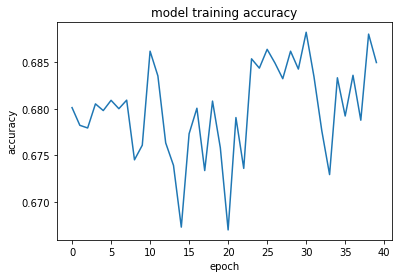

In [205]:
plt.plot(history.history["acc"])

plt.title("model training accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")

plt.show()


In [239]:
score = model.evaluate(x_test, y_test)
print('loss:', score[0])
print('正確率: ', score[1])

10000/10000 [==============================] - 1s 58us/step
loss: 0.04059037536382675
正確率:  0.689


# Activation function : Adam
# Activation Function : SGD
# Nomalization : YES
# Dense : 4, 2, 10

In [218]:
x_train_nomal = x_train / x_train.max()
x_test_nomal = x_test / x_test.max()

In [219]:
model_nomal = Sequential()
model_nomal.add(Dense(4, input_dim=784))
model_nomal.add(Activation('sigmoid'))
model_nomal.add(Dense(2))
model_nomal.add(Activation('sigmoid'))
model_nomal.add(Dense(10))
model_nomal.add(Activation('softmax'))

In [220]:
model_nomal.compile(loss='mse', optimizer=Adam(lr=0.001,beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False), metrics=['accuracy'])

In [221]:
history_nomal = model_nomal.fit(x_train_nomal, y_train, batch_size=64, epochs=120,
                        verbose = 1,
                        validation_data = (x_test_nomal, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/120
60000/60000 [==============================] - 6s 102us/step - loss: 0.0862 - acc: 0.1506 - val_loss: 0.0830 - val_acc: 0.2162
Epoch 2/120
60000/60000 [==============================] - 4s 66us/step - loss: 0.0815 - acc: 0.2566 - val_loss: 0.0793 - val_acc: 0.2920
Epoch 3/120
60000/60000 [==============================] - 4s 66us/step - loss: 0.0770 - acc: 0.3203 - val_loss: 0.0744 - val_acc: 0.3097
Epoch 4/120
60000/60000 [==============================] - 4s 67us/step - loss: 0.0731 - acc: 0.3116 - val_loss: 0.0716 - val_acc: 0.3116
Epoch 5/120
60000/60000 [==============================] - 4s 66us/step - loss: 0.0708 - acc: 0.3164 - val_loss: 0.0697 - val_acc: 0.3150
Epoch 6/120
60000/60000 [==============================] - 4s 67us/step - loss: 0.0691 - acc: 0.3602 - val_loss: 0.0683 - val_acc: 0.3966
Epoch 7/120
60000/60000 [==============================] - 4s 68us/step - loss: 0.0678 - acc: 0.4001 - val_loss: 0.0670 -

60000/60000 [==============================] - 4s 65us/step - loss: 0.0347 - acc: 0.7715 - val_loss: 0.0360 - val_acc: 0.7635
Epoch 60/120
60000/60000 [==============================] - 4s 65us/step - loss: 0.0346 - acc: 0.7729 - val_loss: 0.0358 - val_acc: 0.7669
Epoch 61/120
60000/60000 [==============================] - 4s 65us/step - loss: 0.0345 - acc: 0.7724 - val_loss: 0.0359 - val_acc: 0.7629
Epoch 62/120
60000/60000 [==============================] - 4s 66us/step - loss: 0.0343 - acc: 0.7736 - val_loss: 0.0360 - val_acc: 0.7598
Epoch 63/120
60000/60000 [==============================] - 4s 65us/step - loss: 0.0342 - acc: 0.7737 - val_loss: 0.0355 - val_acc: 0.7685
Epoch 64/120
60000/60000 [==============================] - 4s 66us/step - loss: 0.0341 - acc: 0.7753 - val_loss: 0.0356 - val_acc: 0.7644
Epoch 65/120
60000/60000 [==============================] - 4s 65us/step - loss: 0.0340 - acc: 0.7762 - val_loss: 0.0359 - val_acc: 0.7582
Epoch 66/120
60000/60000 [==============

Epoch 118/120
60000/60000 [==============================] - 4s 66us/step - loss: 0.0320 - acc: 0.7894 - val_loss: 0.0344 - val_acc: 0.7719
Epoch 119/120
60000/60000 [==============================] - 4s 67us/step - loss: 0.0319 - acc: 0.7901 - val_loss: 0.0342 - val_acc: 0.7759
Epoch 120/120
60000/60000 [==============================] - 4s 68us/step - loss: 0.0319 - acc: 0.7897 - val_loss: 0.0341 - val_acc: 0.7758


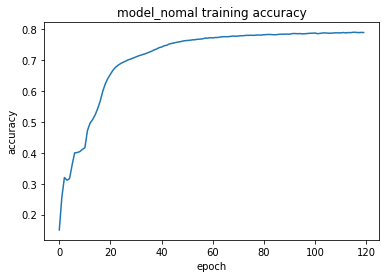

In [222]:
plt.plot(history_nomal.history["acc"])
plt.title("model_nomal training accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.show()

In [237]:
score = model_nomal.evaluate(x_test, y_test)
print('loss:', score[0])
print('正確率: ', score[1])

10000/10000 [==============================] - 1s 65us/step
loss: 0.017119550886005162
正確率:  0.8937


# Optimizer : Adam
# Activation Function : SGD
# Nomalization : YES
# Dense : 20, 20, 10

In [228]:
model_nomal_dense = Sequential()
model_nomal_dense.add(Dense(20, input_dim=784))
model_nomal_dense.add(Activation('sigmoid'))
model_nomal_dense.add(Dense(20))
model_nomal_dense.add(Activation('sigmoid'))
model_nomal_dense.add(Dense(10))
model_nomal_dense.add(Activation('softmax'))

In [241]:
model_nomal_dense.compile(loss='mse', optimizer=Adam(lr=0.001,beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False), metrics=['accuracy'])

In [230]:
history_nomal_dense = model_nomal_dense.fit(x_train_nomal, y_train, batch_size=64, epochs=120,
                        verbose = 1,
                        validation_data = (x_test_nomal, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/120
60000/60000 [==============================] - 7s 124us/step - loss: 0.0522 - acc: 0.6427 - val_loss: 0.0231 - val_acc: 0.8793
Epoch 2/120
60000/60000 [==============================] - 5s 84us/step - loss: 0.0178 - acc: 0.8984 - val_loss: 0.0143 - val_acc: 0.9095
Epoch 3/120
60000/60000 [==============================] - 5s 90us/step - loss: 0.0132 - acc: 0.9184 - val_loss: 0.0121 - val_acc: 0.9230
Epoch 4/120
60000/60000 [==============================] - 5s 85us/step - loss: 0.0113 - acc: 0.9291 - val_loss: 0.0108 - val_acc: 0.9294
Epoch 5/120
60000/60000 [==============================] - 5s 87us/step - loss: 0.0101 - acc: 0.9358 - val_loss: 0.0100 - val_acc: 0.9344
Epoch 6/120
60000/60000 [==============================] - 5s 85us/step - loss: 0.0093 - acc: 0.9414 - val_loss: 0.0095 - val_acc: 0.9385
Epoch 7/120
60000/60000 [==============================] - 5s 86us/step - loss: 0.0087 - acc: 0.9460 - val_loss: 0.0091 -

60000/60000 [==============================] - 5s 86us/step - loss: 0.0027 - acc: 0.9857 - val_loss: 0.0076 - val_acc: 0.9514
Epoch 60/120
60000/60000 [==============================] - 5s 82us/step - loss: 0.0026 - acc: 0.9861 - val_loss: 0.0075 - val_acc: 0.9522
Epoch 61/120
60000/60000 [==============================] - 5s 85us/step - loss: 0.0026 - acc: 0.9861 - val_loss: 0.0074 - val_acc: 0.9535
Epoch 62/120
60000/60000 [==============================] - 5s 90us/step - loss: 0.0026 - acc: 0.9864 - val_loss: 0.0075 - val_acc: 0.9521
Epoch 63/120
60000/60000 [==============================] - 6s 93us/step - loss: 0.0025 - acc: 0.9867 - val_loss: 0.0075 - val_acc: 0.9526
Epoch 64/120
60000/60000 [==============================] - 5s 84us/step - loss: 0.0025 - acc: 0.9867 - val_loss: 0.0075 - val_acc: 0.9528
Epoch 65/120
60000/60000 [==============================] - 5s 89us/step - loss: 0.0025 - acc: 0.9868 - val_loss: 0.0076 - val_acc: 0.9524
Epoch 66/120
60000/60000 [==============

Epoch 118/120
60000/60000 [==============================] - 5s 83us/step - loss: 0.0017 - acc: 0.9905 - val_loss: 0.0082 - val_acc: 0.9501
Epoch 119/120
60000/60000 [==============================] - 5s 83us/step - loss: 0.0017 - acc: 0.9908 - val_loss: 0.0079 - val_acc: 0.9523
Epoch 120/120
60000/60000 [==============================] - 5s 85us/step - loss: 0.0017 - acc: 0.9911 - val_loss: 0.0080 - val_acc: 0.9513


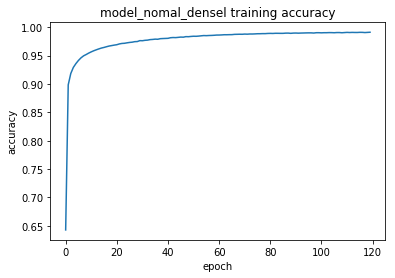

In [236]:
plt.plot(history_nomal_dense.history["acc"])
plt.title("model_nomal_densel training accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.show()

In [240]:
score = model_nomal_dense.evaluate(x_test, y_test)
print('loss:', score[0])
print('正確率: ', score[1])

10000/10000 [==============================] - 1s 61us/step
loss: 0.01629559088667577
正確率:  0.9029


# Optimizer : Adam
# Activation Function : relu
# Nomalization : YES
# Dense : 20, 20, 10

In [242]:
model_nomal_dense_relu = Sequential()
model_nomal_dense_relu.add(Dense(20, input_dim=784))
model_nomal_dense_relu.add(Activation('relu'))
model_nomal_dense_relu.add(Dense(20))
model_nomal_dense_relu.add(Activation('relu'))
model_nomal_dense_relu.add(Dense(10))
model_nomal_dense_relu.add(Activation('softmax'))

In [243]:
model_nomal_dense_relu.compile(loss='mse', optimizer=Adam(lr=0.001,beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False), metrics=['accuracy'])

In [245]:
history_nomal_dense_relu = model_nomal_dense_relu.fit(x_train_nomal, y_train, batch_size=64, epochs=120,
                        verbose = 1,
                        validation_data = (x_test_nomal, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/120
60000/60000 [==============================] - 8s 128us/step - loss: 0.0219 - acc: 0.8549 - val_loss: 0.0113 - val_acc: 0.9268
Epoch 2/120
60000/60000 [==============================] - 5s 89us/step - loss: 0.0108 - acc: 0.9307 - val_loss: 0.0097 - val_acc: 0.9372
Epoch 3/120
60000/60000 [==============================] - 5s 90us/step - loss: 0.0091 - acc: 0.9419 - val_loss: 0.0086 - val_acc: 0.9439
Epoch 4/120
60000/60000 [==============================] - 6s 98us/step - loss: 0.0082 - acc: 0.9481 - val_loss: 0.0082 - val_acc: 0.9460
Epoch 5/120
60000/60000 [==============================] - 6s 95us/step - loss: 0.0075 - acc: 0.9527 - val_loss: 0.0086 - val_acc: 0.9440
Epoch 6/120
60000/60000 [==============================] - 7s 117us/step - loss: 0.0069 - acc: 0.9557 - val_loss: 0.0072 - val_acc: 0.9524
Epoch 7/120
60000/60000 [==============================] - 8s 134us/step - loss: 0.0065 - acc: 0.9593 - val_loss: 0.0074

60000/60000 [==============================] - 7s 115us/step - loss: 0.0023 - acc: 0.9867 - val_loss: 0.0066 - val_acc: 0.9616
Epoch 60/120
60000/60000 [==============================] - 6s 102us/step - loss: 0.0025 - acc: 0.9857 - val_loss: 0.0067 - val_acc: 0.9605
Epoch 61/120
60000/60000 [==============================] - 7s 109us/step - loss: 0.0023 - acc: 0.9871 - val_loss: 0.0065 - val_acc: 0.9612
Epoch 62/120
60000/60000 [==============================] - 6s 98us/step - loss: 0.0023 - acc: 0.9869 - val_loss: 0.0067 - val_acc: 0.9611
Epoch 63/120
60000/60000 [==============================] - 6s 95us/step - loss: 0.0023 - acc: 0.9868 - val_loss: 0.0068 - val_acc: 0.9598
Epoch 64/120
60000/60000 [==============================] - 6s 94us/step - loss: 0.0023 - acc: 0.9867 - val_loss: 0.0068 - val_acc: 0.9577
Epoch 65/120
60000/60000 [==============================] - 6s 96us/step - loss: 0.0023 - acc: 0.9873 - val_loss: 0.0065 - val_acc: 0.9628
Epoch 66/120
60000/60000 [===========

60000/60000 [==============================] - 6s 93us/step - loss: 0.0019 - acc: 0.9890 - val_loss: 0.0070 - val_acc: 0.9604
Epoch 118/120
60000/60000 [==============================] - 6s 102us/step - loss: 0.0018 - acc: 0.9899 - val_loss: 0.0068 - val_acc: 0.9607
Epoch 119/120
60000/60000 [==============================] - 6s 95us/step - loss: 0.0020 - acc: 0.9887 - val_loss: 0.0077 - val_acc: 0.9570
Epoch 120/120
60000/60000 [==============================] - 6s 95us/step - loss: 0.0020 - acc: 0.9887 - val_loss: 0.0069 - val_acc: 0.9601


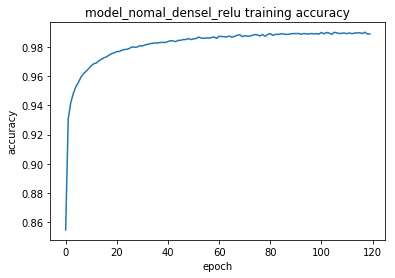

In [246]:
plt.plot(history_nomal_dense_relu.history["acc"])
plt.title("model_nomal_densel_relu training accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.show()

In [247]:
score = model_nomal_dense_relu.evaluate(x_test, y_test)
print('loss:', score[0])
print('正確率: ', score[1])

10000/10000 [==============================] - 1s 70us/step
loss: 0.009054598493874072
正確率:  0.9547


In [248]:
from ipywidgets import interact_manual
predict = model.predict_classes(x_test)
def test(測試編號):
    plt.imshow(x_test[測試編號].reshape(28,28), cmap='Greys')
    print('神經網路判斷為:', predict[測試編號], ' \n答案為:', y_test[測試編號])
interact_manual(test, 測試編號=(0, 9999))

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

<function __main__.test(測試編號)>